# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save it as raw data.
* Inspect the data and save it under outputs/datasets/collection

## Inputs

*   Kaggle JSON file - the authentication token.

## Outputs

* Generate Dataset: outputs/datasets/collection/TelcoCustomerChurn.csv

---

# Change working directory

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction'

---

# Load Collected data

In [5]:
import pandas as pd

df_movies = pd.read_csv('encoded_movies.csv')

print(df_movies.head().to_string(index=False))

original_language    budget    revenue  Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  Fantasy  Foreign  History  Horror  Music  Mystery  Romance  Science Fiction  TV Movie  Thriller  War  Western  language_encoded
               en 237000000 2787965087       1          1          0       0      0            0      0       0        1        0        0       0      0        0        0                1         0         0    0        0                 0
               en 300000000  961000000       1          1          0       0      0            0      0       0        1        0        0       0      0        0        0                0         0         0    0        0                 0
               en 245000000  880674609       1          1          0       0      1            0      0       0        0        0        0       0      0        0        0                0         0         0    0        0                 0
               en 250000000 10849390

# Data Exploration

In Data Cleaning you are interested to check the distribution and shape of a variable with missing data.

In [6]:
import pandas as pd

df_movies = pd.read_csv('encoded_movies.csv')

print("Missing values in each column:")
print(df_movies.isnull().sum())

Missing values in each column:
original_language    0
budget               0
revenue              0
Action               0
Adventure            0
Animation            0
Comedy               0
Crime                0
Documentary          0
Drama                0
Family               0
Fantasy              0
Foreign              0
History              0
Horror               0
Music                0
Mystery              0
Romance              0
Science Fiction      0
TV Movie             0
Thriller             0
War                  0
Western              0
language_encoded     0
dtype: int64


Profiling

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_movies, title='Movies Dataset Profiling Report')

# Save report as HTML
profile.to_file("movies_profile_report.html")

/tmp/ipykernel_5500/3148356061.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation and PPS Analysis

Calculate Correlations and Power Predictive Score


Correlation between budget and revenue:
           budget   revenue
budget   1.000000  0.730823
revenue  0.730823  1.000000


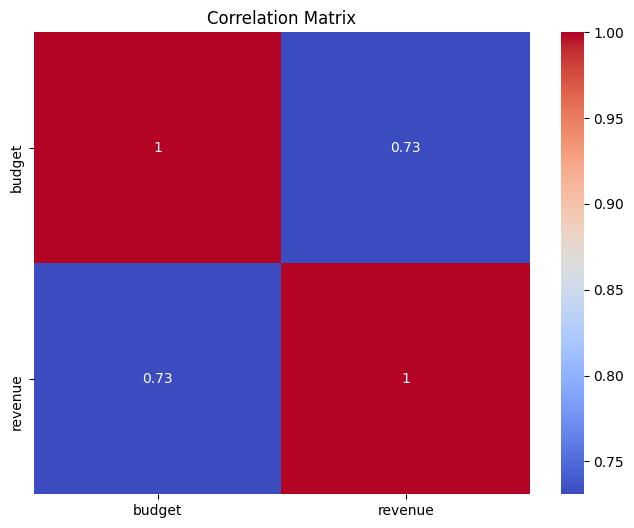

In [8]:
# Calculate correlations
correlations = df_movies[['budget', 'revenue']].corr()

# Print correlations
print("\nCorrelation between budget and revenue:")
print(correlations)

# Visualize correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Display at Heatmaps

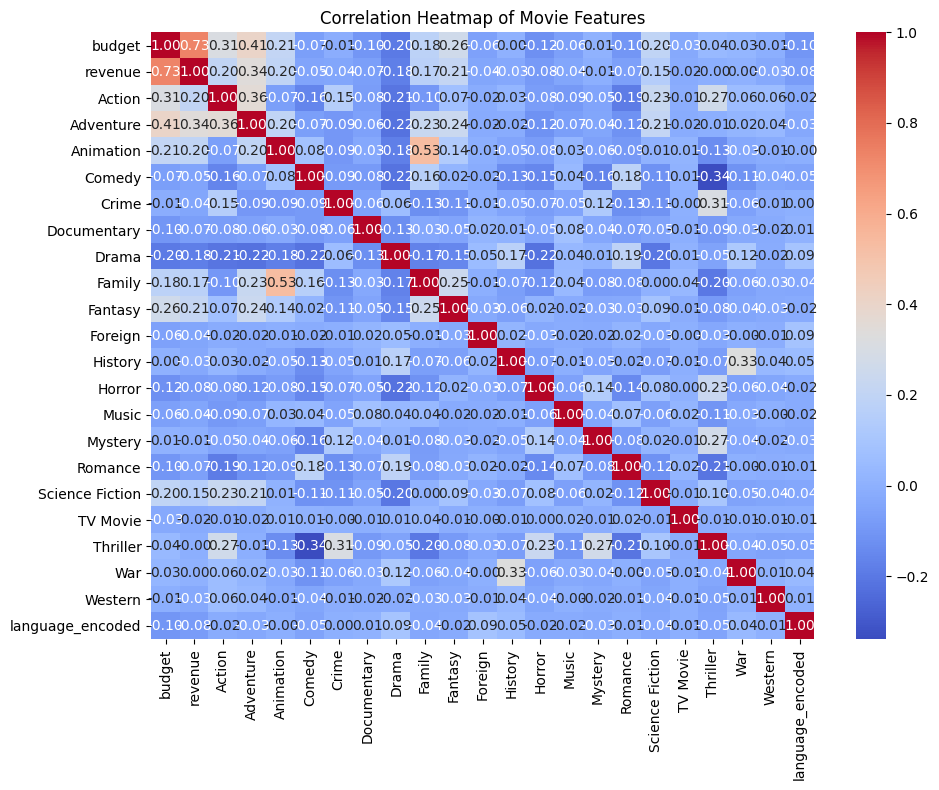

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df_movies.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Movie Features')
plt.tight_layout()
plt.show()

# Data Cleaning

## Assessing Missing Data Levels

Check missing data levels for the collected dataset.

In [10]:
missing = df_movies.isnull().sum()
missing_percent = (missing / len(df_movies)) * 100

# Display results
print("Missing values summary:")
print("\nCount of missing values:")
print(missing[missing > 0])
print("\nPercentage of missing values:")
print(missing_percent[missing_percent > 0])

Missing values summary:

Count of missing values:
Series([], dtype: int64)

Percentage of missing values:
Series([], dtype: float64)


## Data Cleaning Spreadsheet Summary

No missing data found


### Split Train and Test Set

In [11]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_movies[['original_language', 'budget', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']]
y = df_movies['revenue'] - df_movies ['budget']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3842, 22)
Testing set shape: (961, 22)


### Drop Variables

In [12]:

print("Current columns:", df_movies.columns)


Current columns: Index(['original_language', 'budget', 'revenue', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'language_encoded'],
      dtype='object')


In [13]:
f_movies = df_movies.drop('original_language', axis=1,inplace=True)
print("Columns after dropping 'original_language':", df_movies.columns)

Columns after dropping 'original_language': Index(['budget', 'revenue', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'language_encoded'],
      dtype='object')


# Push cleaned data to Repo

In [14]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') 
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/datasets/cleaned'


## Train Set

In [15]:
X_train.to_csv("outputs/datasets/cleaned/X_train_cleaned.csv", index=False)
y_train.to_csv("outputs/datasets/cleaned/y_train_cleaned.csv", index=False)

## Test Set

In [16]:
X_test.to_csv("outputs/datasets/cleaned/X_test_cleaned.csv", index=False)
y_test.to_csv("outputs/datasets/cleaned/y_test_cleaned.csv", index=False)

In [17]:
print(os.listdir('outputs/datasets/cleaned'))

['X_test_cleaned.csv', 'X_train_cleaned.csv', 'y_test_cleaned.csv', 'y_train_cleaned.csv']


In [18]:
import os
# Print current working directory
print("Current working directory:", os.getcwd())
# Print absolute path to one of the files
print("Full path to X_train:", os.path.abspath("outputs/datasets/cleaned/X_train_cleaned.csv"))

Current working directory: /workspace/Film_Hit_prediction
Full path to X_train: /workspace/Film_Hit_prediction/outputs/datasets/cleaned/X_train_cleaned.csv
